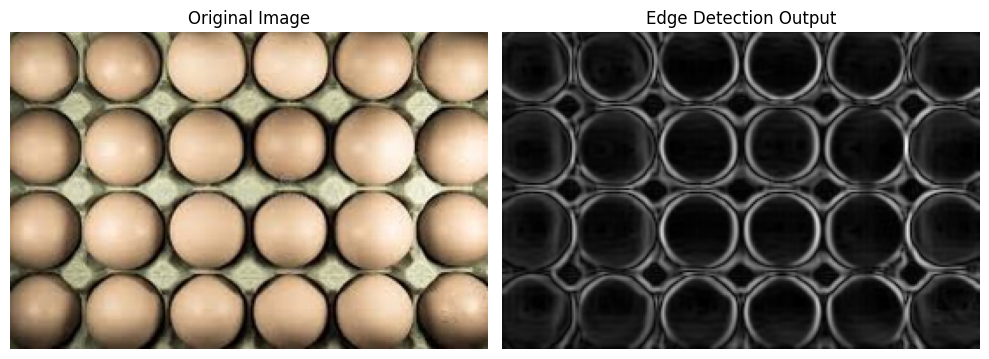

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def edge_detection(image, a, b):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Convert the image to float32 for gradient calculations
    gray_image = gray_image.astype(np.float32)

    our_x = np.array([[-b, -a, 0, a, b],
                          [-b, -a, 0, a, b],
                          [-b, -a, 0, a, b],
                          [-b, -a, 0, a, b],
                          [-b, -a, 0, a, b]])

    our_y = np.array([[-b, -b, -b, -b, -b],
                          [-a, -a, -a, -a, -a],
                          [ 0,  0,  0,  0,  0],
                          [ a,  a,  a,  a,  a],
                          [ b,  b,  b,  b,  b]])


    # Apply the Sobel kernels using convolution
    gradient_x = cv2.filter2D(gray_image, -1, our_x, borderType=cv2.BORDER_REPLICATE)
    gradient_y = cv2.filter2D(gray_image, -1, our_y, borderType=cv2.BORDER_REPLICATE)

    # Calculate the magnitude of gradients
    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

    # Normalize the gradient magnitude to 0-255
    gradient_magnitude = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX)

    # Convert back to uint8
    gradient_magnitude = gradient_magnitude.astype(np.uint8)

    return gradient_magnitude

# Read the input image
image_path = 'eggs.jpg'
image = cv2.imread(image_path)

# Specify values for a and b
a = 2
b = 1

# Apply edge detection
output = edge_detection(image, a, b)

# Display the original image and edge detection output
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(output, cmap='gray')
axes[1].set_title('Edge Detection Output')
axes[1].axis('off')

plt.tight_layout()
plt.show()


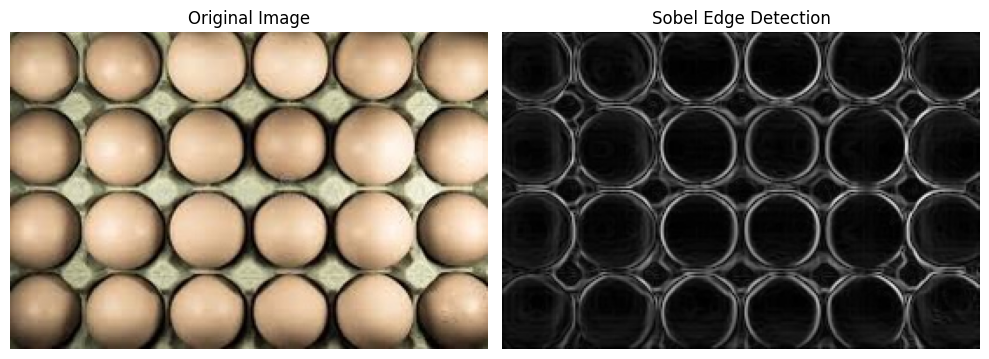

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def sobel_edge_detection(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Sobel edge detection
    sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)

    # Calculate the magnitude of gradients
    gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

    # Normalize the gradient magnitude to 0-255
    gradient_magnitude = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

    return gradient_magnitude

# Read the input image
image_path = 'eggs.jpg'
image = cv2.imread(image_path)

# Apply Sobel edge detection
edges = sobel_edge_detection(image)

# Display the original image and edge detection output
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(edges, cmap='gray')
axes[1].set_title('Sobel Edge Detection')
axes[1].axis('off')

plt.tight_layout()
plt.show()
